## 0. Some basic imports

You need to install the following packages
* pip install pcst_fast # Probably needs Python3.7 (easy in conda environment). We could build a version on our own.
* pip install matplotlib
* pip install networkx

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import networkx as nx
import numpy as np


In [6]:
from utils.ppi import PpiInstance, read_ppi, read_terminals, CoVexEdgeWeight, UnitEdgeWeight

# 1. Loading the instance

In [7]:
# Instance
graph = read_ppi("../data/2020-07-07/protein-protein-interaction.txt")
terminals = read_terminals("../data/2020-07-07/all-seeds/0001475.txt")
edge_weights = CoVexEdgeWeight(graph, 0.5)
#edge_weights = UnitEdgeWeight()
ppi_instance = PpiInstance(graph, terminals, edge_weights)

Setting the graph_diameter to the precomputed value of 8. Directly specify meta to overwrite this.


# 2. Solving the instance

In [8]:
from utils import ExpMinMaxDiverseSteinerTreeComputer, display_solution_set

Vertices in all solutions:  107
Average size of solution:  44.45454545454545
Average cost of solution: 1611.9796321645058
Minimum cost of solution: 1578.6916110041877
Maximum cost of solution: 1671.2336691950625


/home/krupke/anaconda3/envs/biosteiner/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


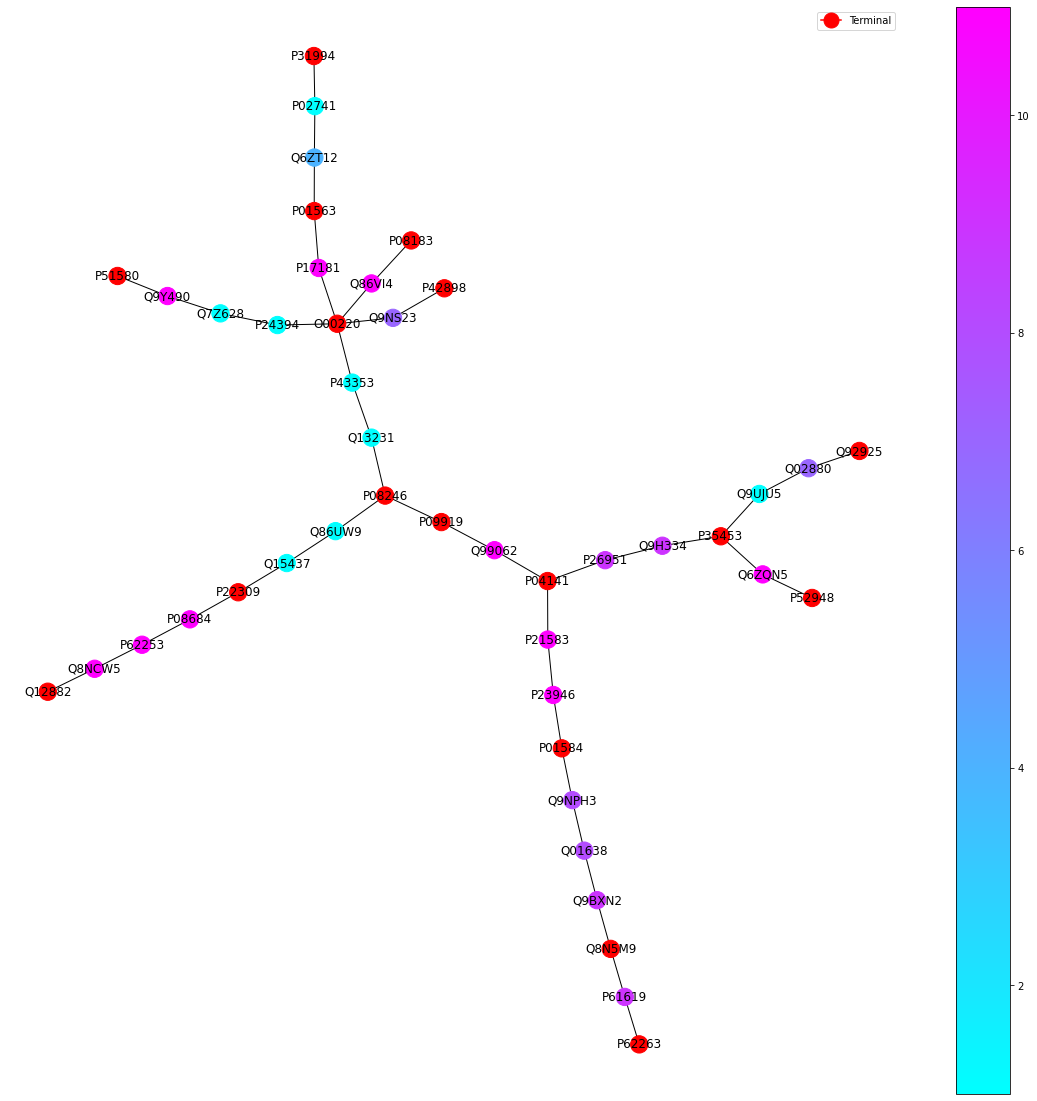

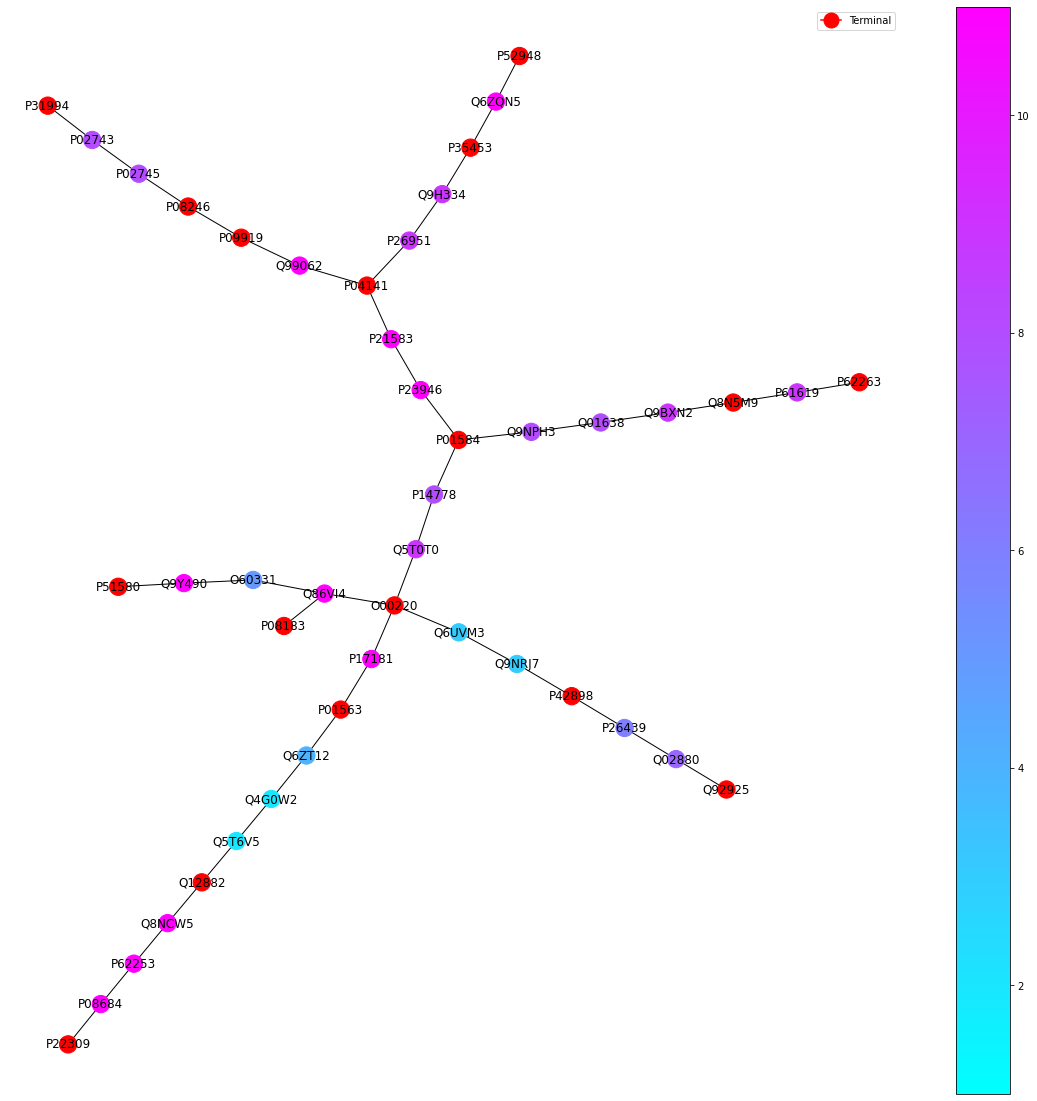

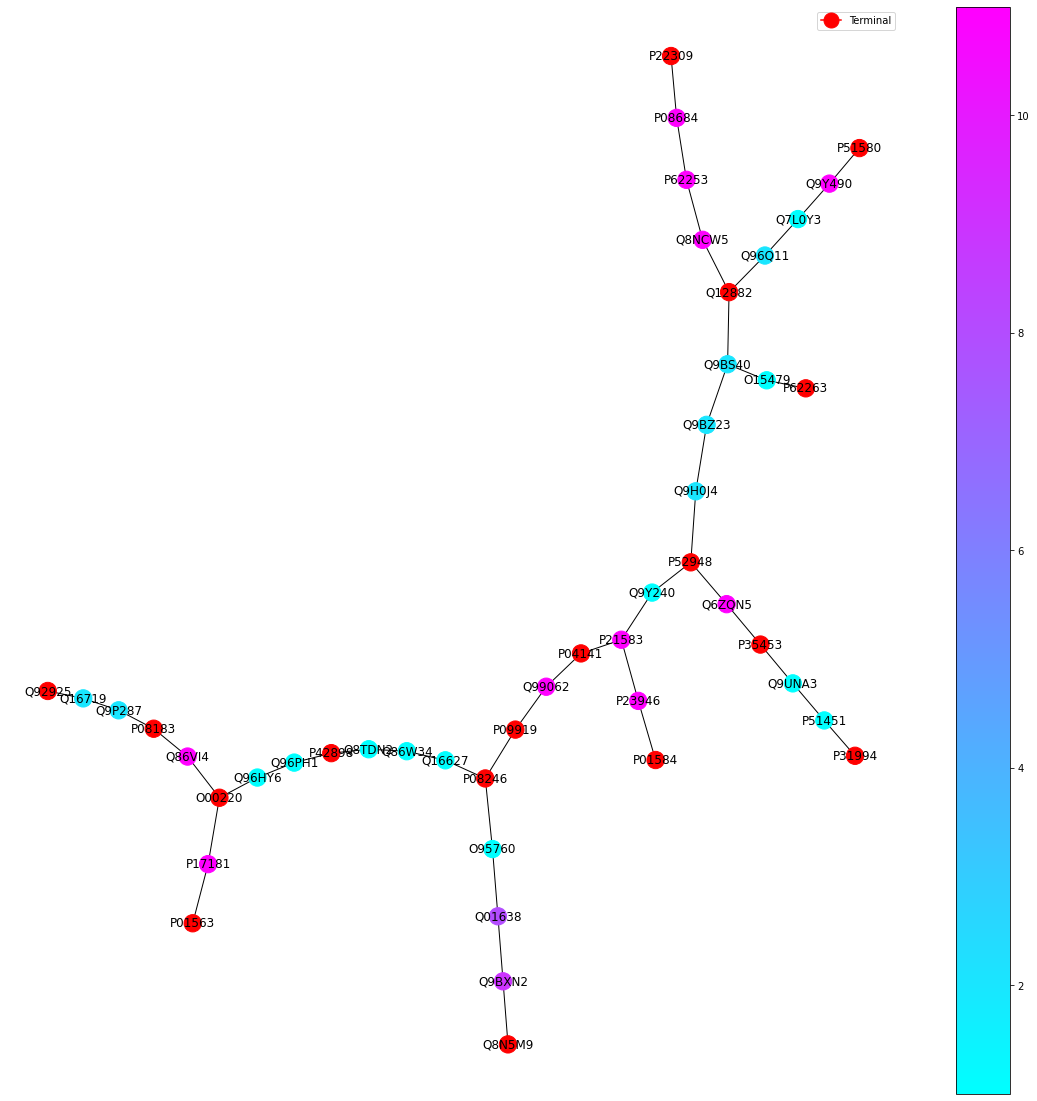

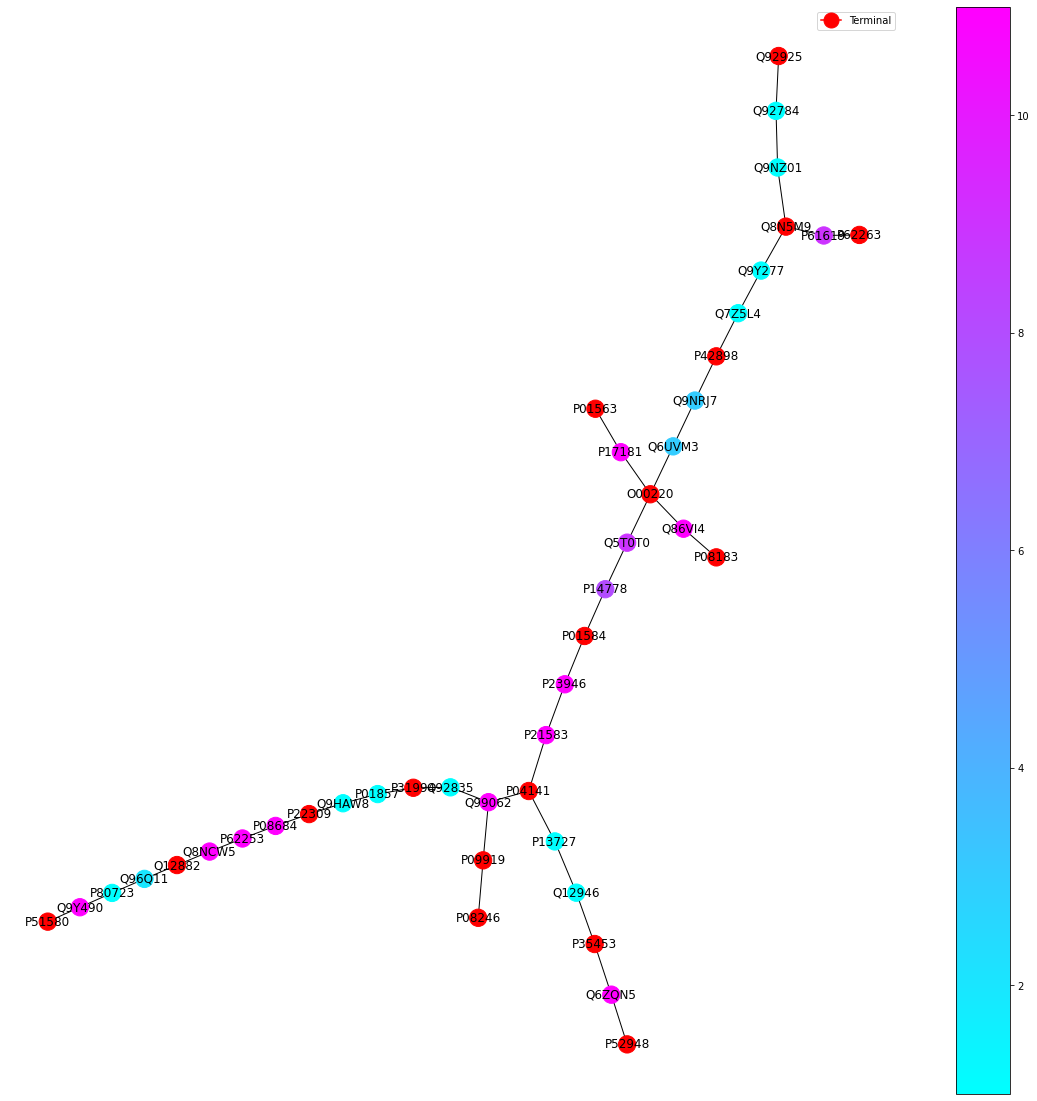

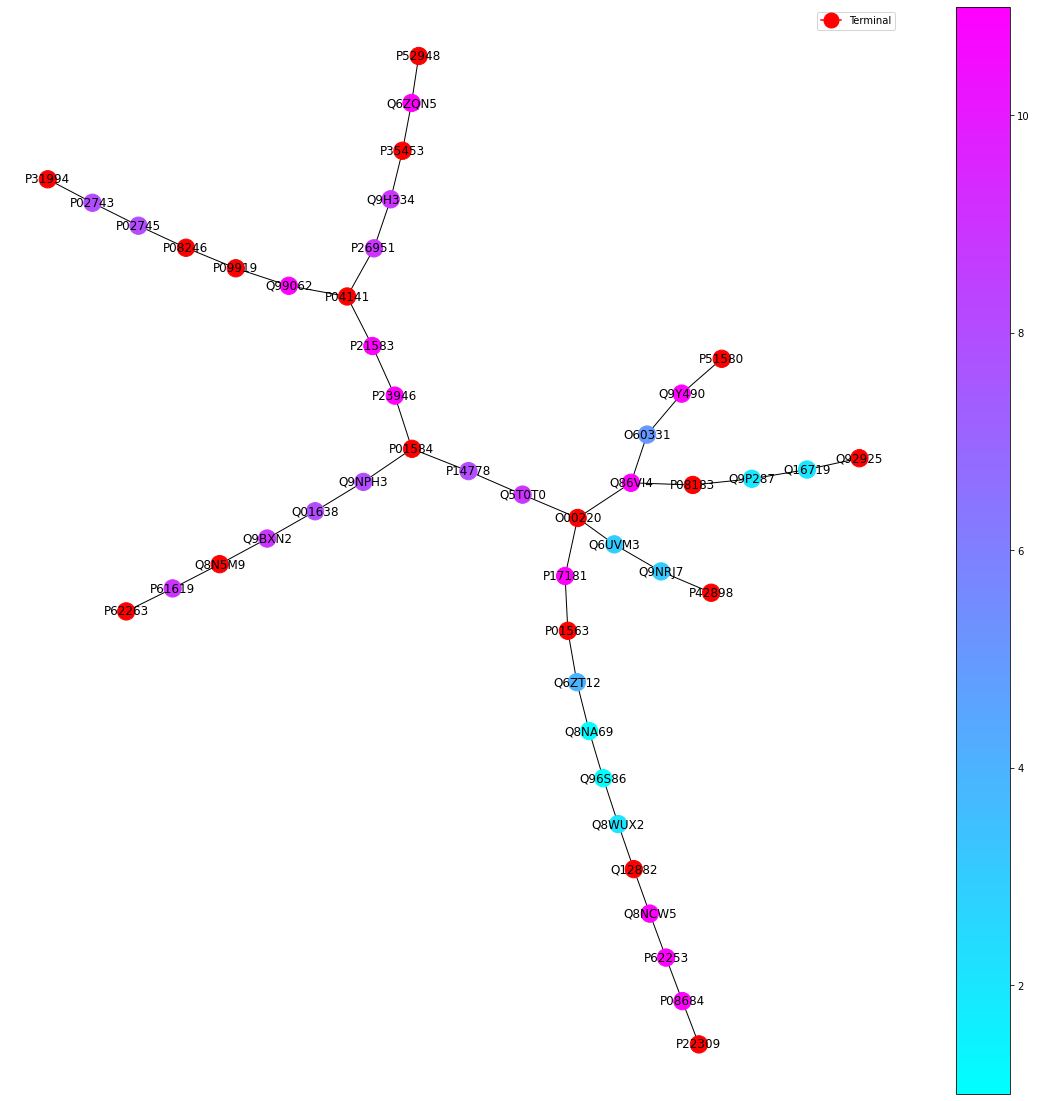

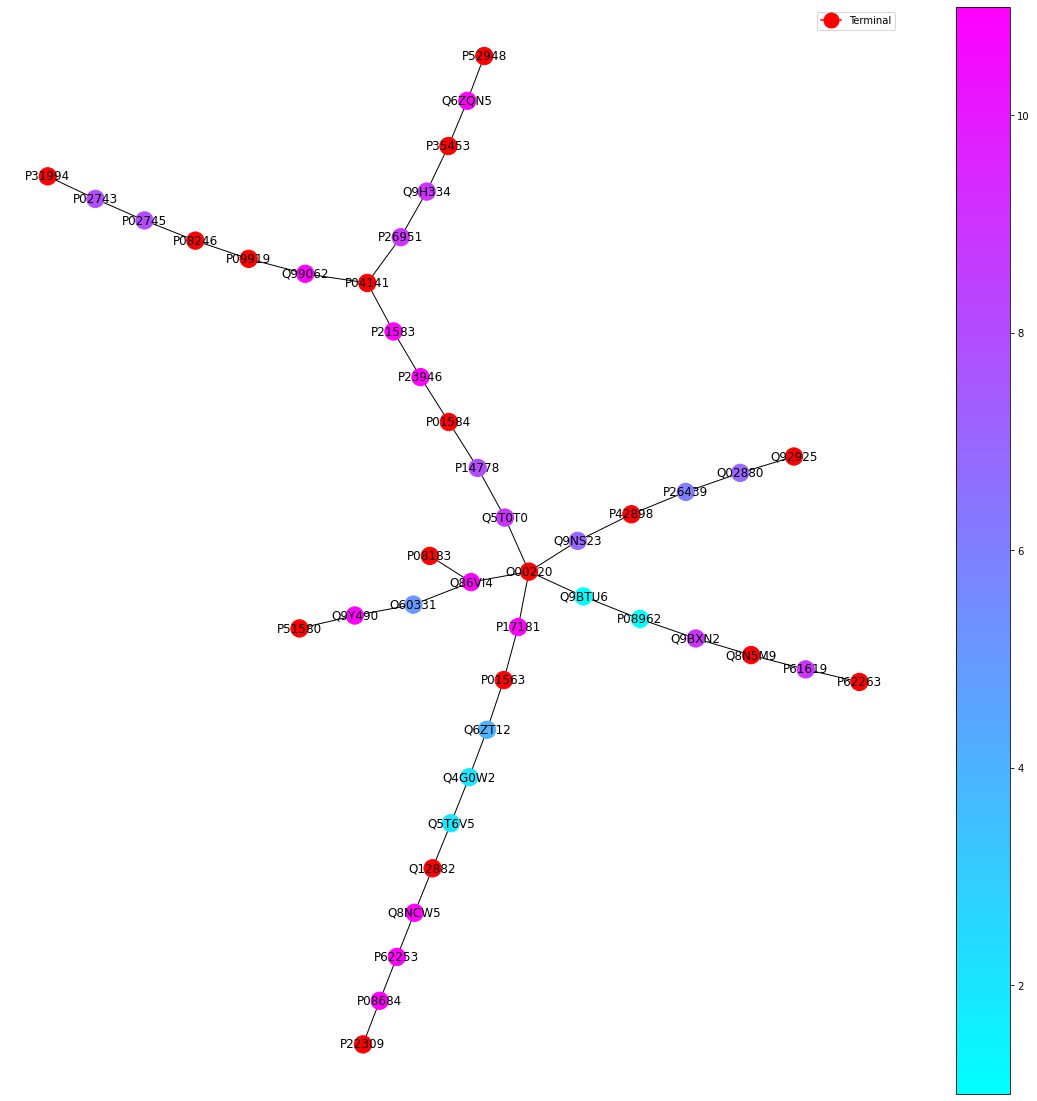

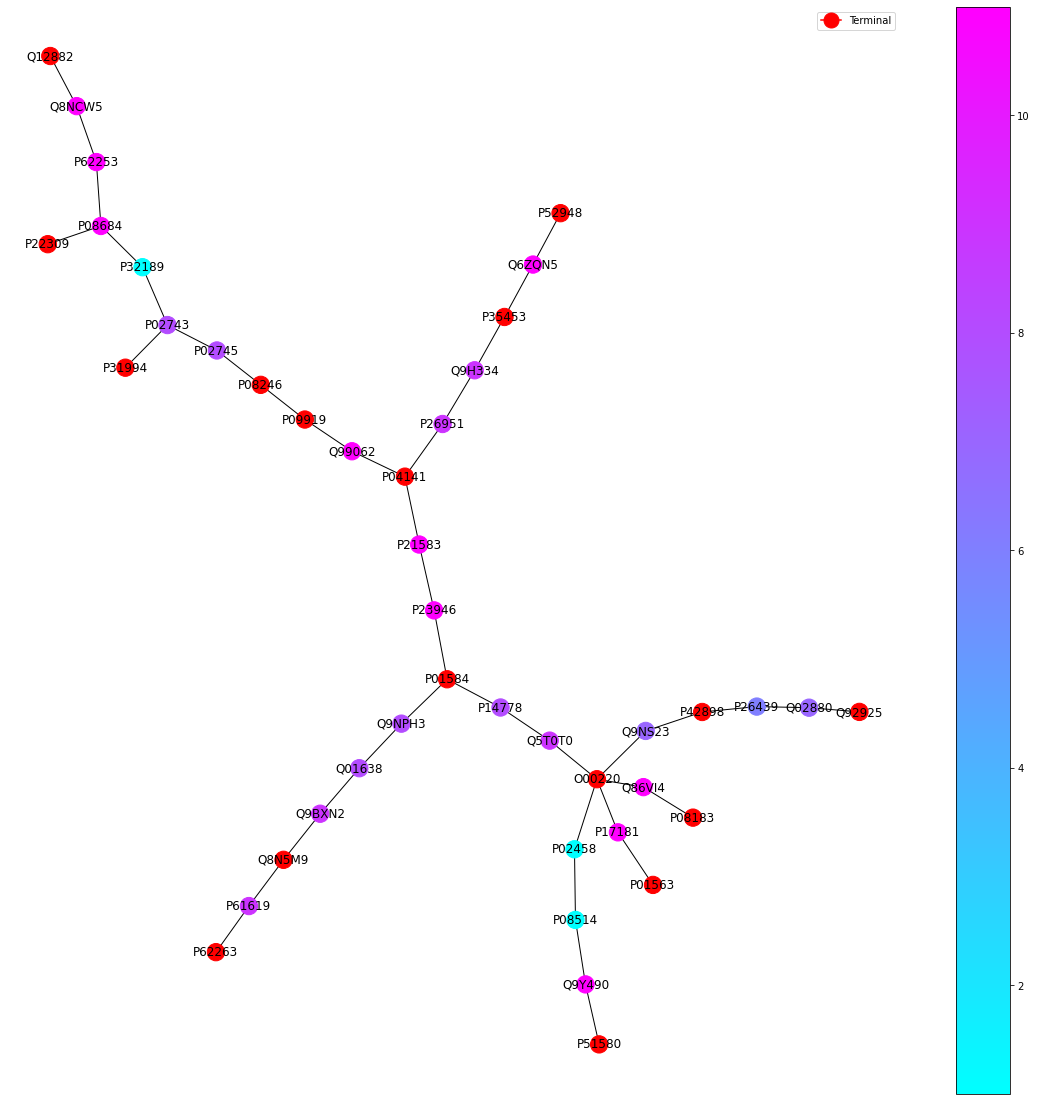

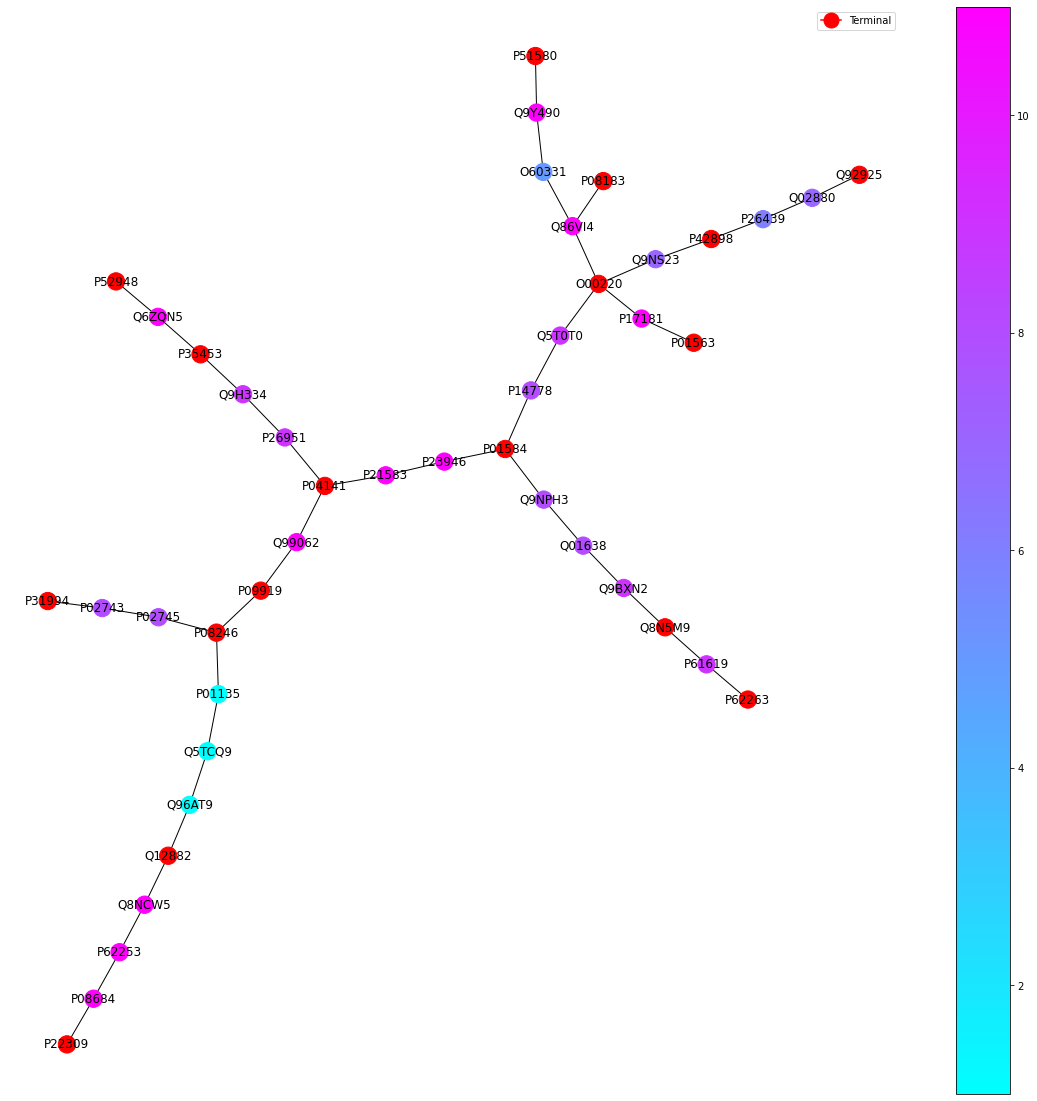

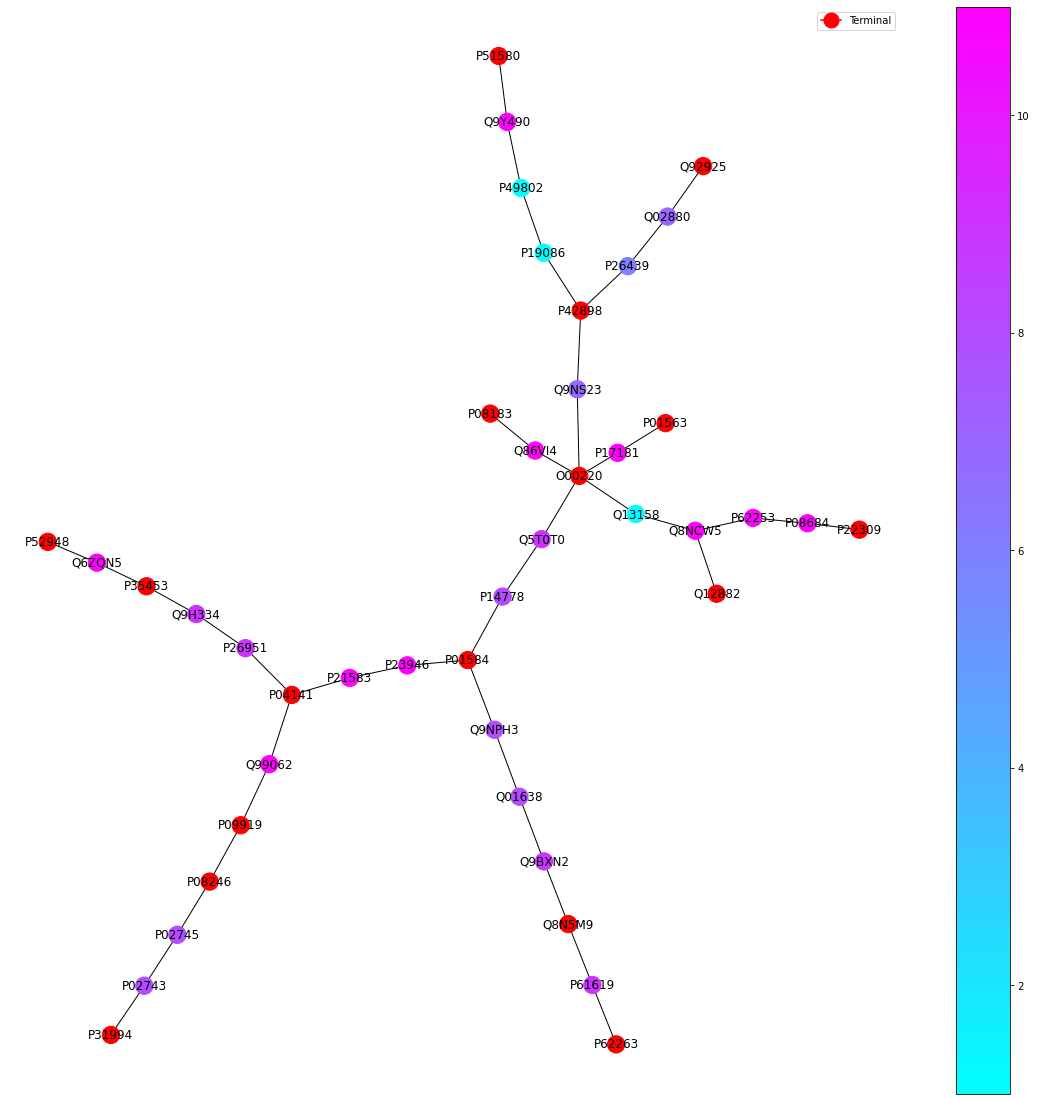

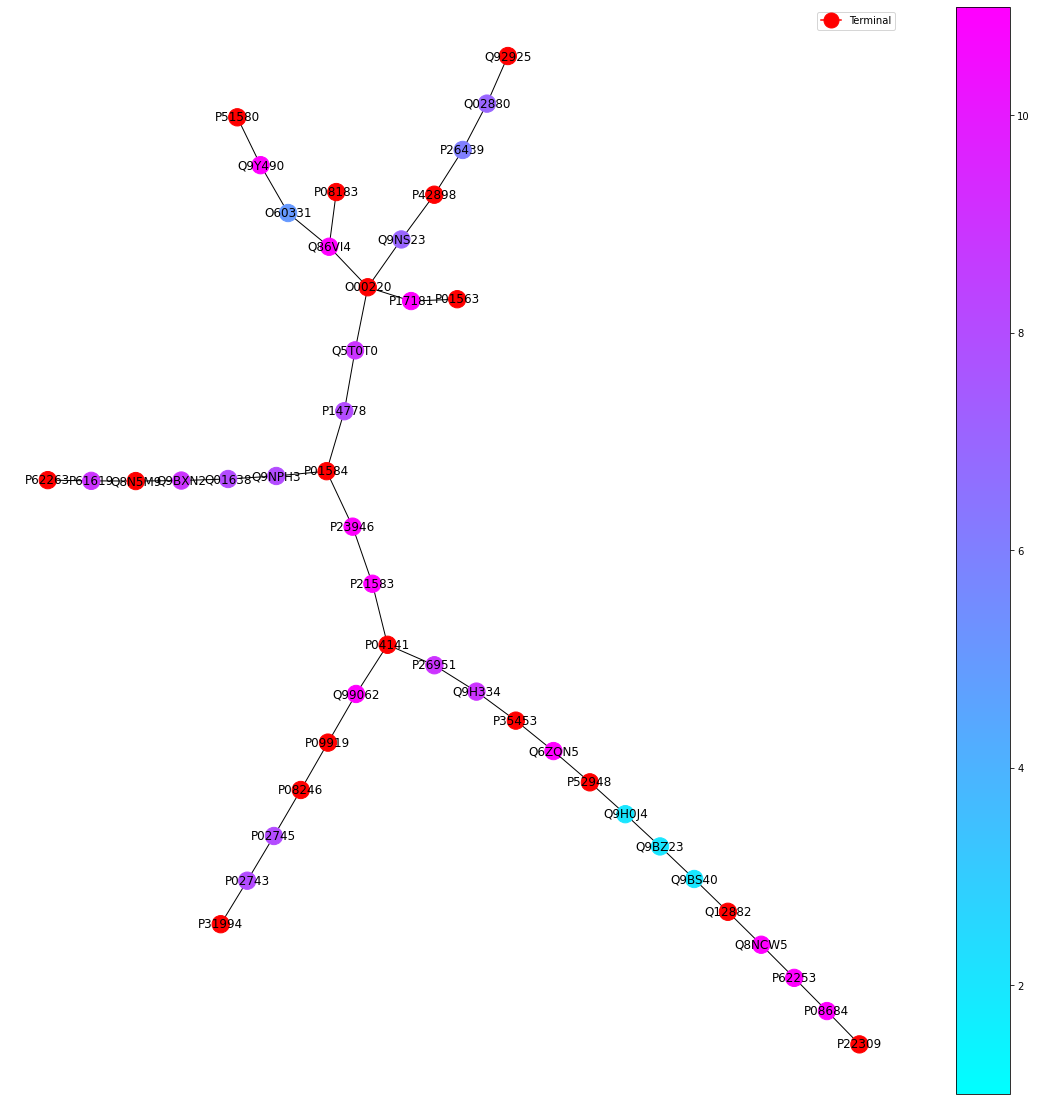

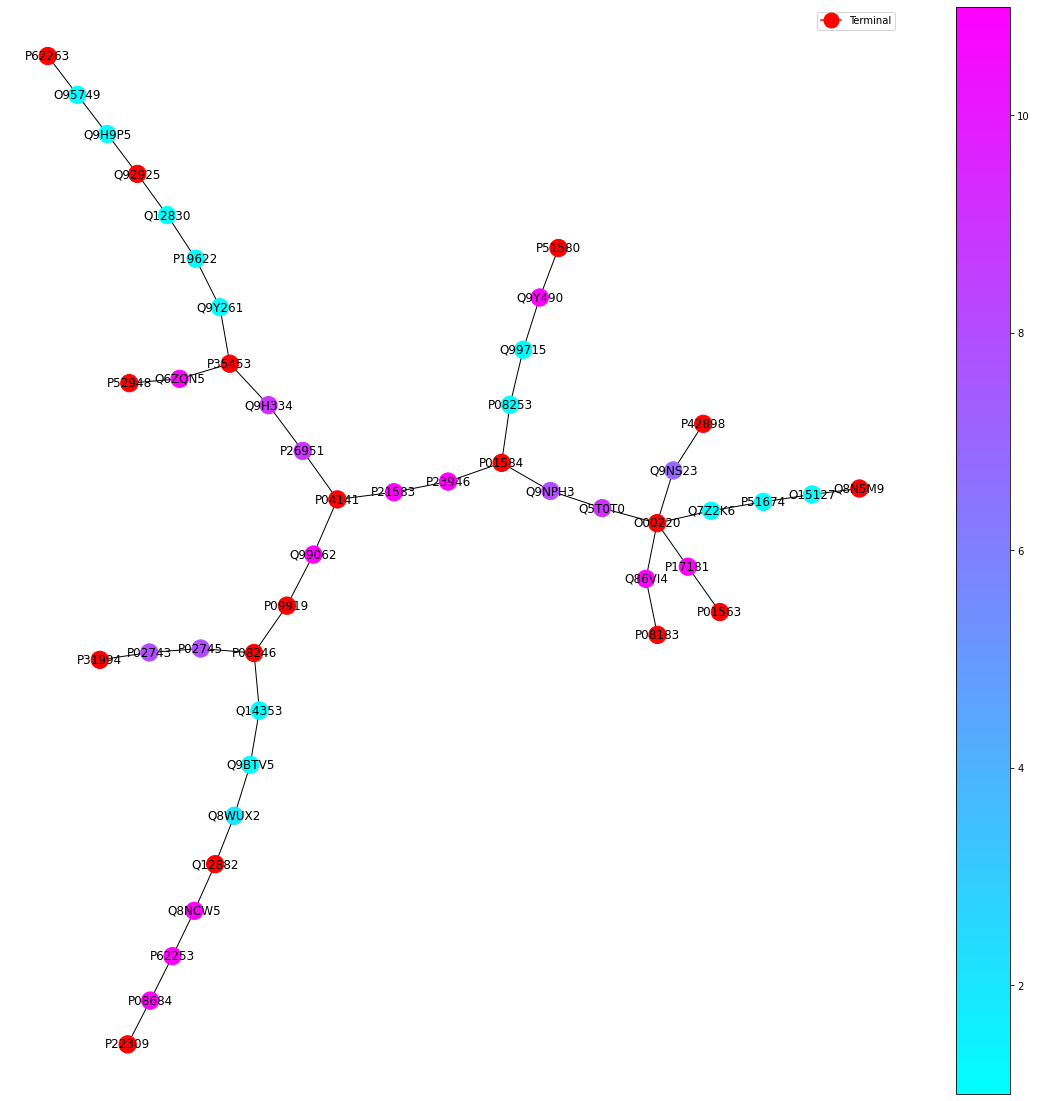

In [9]:
engine = ExpMinMaxDiverseSteinerTreeComputer(initial_fraction=0.2,
                                            reduction_factor=0.3)
# The most important parameter seems to be initial_fraction.
steiner_trees = engine(ppi_instance, n=10)
display_solution_set(steiner_trees)

We speak of edge weight for the instance and of edge costs for the pcst. The edge costs might be changed to obtain different pcst but will probably be identical in the beginning.


